TASK1

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('test.csv')

# Handle missing values
df.dropna(inplace=True)

# Split the data into features (X) and target variable (y)
X = df[['square_footage', 'num_bedrooms', 'num_bathrooms']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the results
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

KeyError: "None of [Index(['square_footage', 'num_bedrooms', 'num_bathrooms'], dtype='object')] are in the [columns]"

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('train.csv')

# Select the relevant features
X = df[['LowQualFinSF','FullBath', 'Bedroom']]
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Use the model to make predictions on new data
new_data = pd.DataFrame({'SqFt': [2000, 2500, 3000], 'Bedrooms': [3, 4, 5], 'Bathrooms': [2, 3, 4]})
new_predictions = model.predict(new_data)
print(new_predictions)

KeyError: "['Bedroom'] not in index"

TASK 2

C:\Users\SHREYASI DEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SHREYASI DEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHREYASI DEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SHREYASI DEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

Silhouette Score: 0.5546571631111091


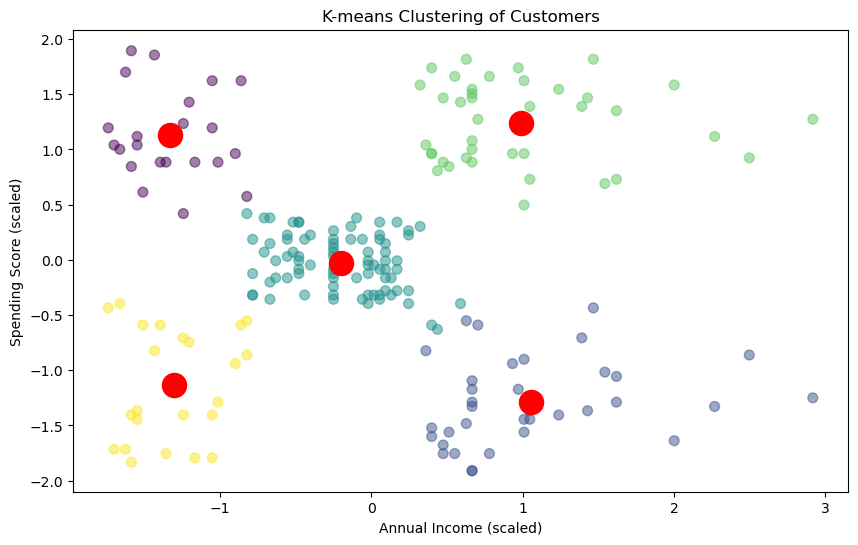

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Step 2: Feature Selection/Engineering
X = data.iloc[:, [3, 4]].values  # Using Annual Income and Spending Score for clustering

# Step 3: Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: K-means Clustering
def find_optimal_clusters(data, max_k):
    """
    Find the optimal number of clusters using the silhouette score.
    """
    scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        scores.append(silhouette_score(data, kmeans.labels_))
    return scores.index(max(scores)) + 2

# Find optimal number of clusters
max_clusters = 10
optimal_clusters = find_optimal_clusters(X_scaled, max_clusters)

# Perform K-means clustering with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Step 5: Evaluation (Using silhouette score)
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


In [4]:
import os
print(os.environ["OMP_NUM_THREADS"])


1


C:\Users\SHREYASI DEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHREYASI DEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHREYASI DEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHREYASI DEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to 

Silhouette Score: 0.5546571631111091


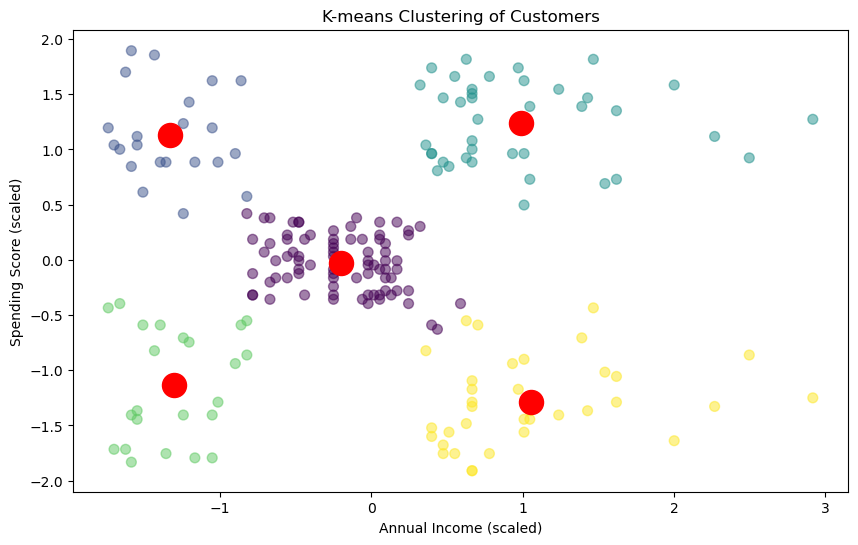

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Step 2: Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Step 3: Feature Selection/Engineering
X = data.iloc[:, [3, 4]].values  # Using Annual Income and Spending Score for clustering

# Step 4: Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: K-means Clustering
def find_optimal_clusters(data, max_k):
    """
    Find the optimal number of clusters using the silhouette score.
    """
    scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)
        scores.append(silhouette_score(data, kmeans.labels_))
    return scores.index(max(scores)) + 2

# Find optimal number of clusters
max_clusters = 10
optimal_clusters = find_optimal_clusters(X_scaled, max_clusters)

# Perform K-means clustering with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Step 6: Evaluation (Using silhouette score)
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()
